## Problem.1

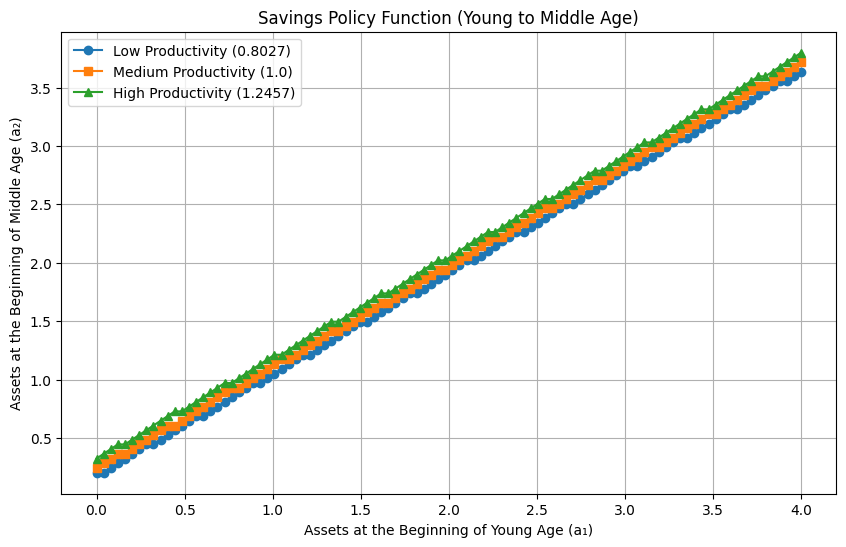

In [2]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt

# Parameters
gamma = 2.0
beta = 0.985**20
r = 1.025**20 - 1.0
JJ = 3 # Number of periods
l = np.array([0.8027, 1.0, 1.2457]) # Productivity levels
NL = 3 # Number of productivity levels

# Transition matrix for middle-age income uncertainty
prob = np.array([
    [0.7451, 0.2528, 0.0021],
    [0.1360, 0.7281, 0.1360],
    [0.0021, 0.2528, 0.7451]
])

# Grids
a_l = 0.0
a_u = 4.0 # Upper bound for assets can be adjusted
NA = 100
a = np.linspace(a_l, a_u, NA)

# Utility function
def util(c, gamma):
    if c > 0:
        return (c**(1 - gamma)) / (1 - gamma)
    else:
        # Return a large negative number for non-positive consumption
        return -np.inf

# Initialization
v = np.zeros((JJ, NA, NL)) # Value function for 3 periods
iaplus = np.zeros((JJ-1, NA, NL), dtype=int) # Policy function indices
aplus = np.zeros((JJ-1, NA, NL)) # Savings policy function for young and middle age

# --- Backward Induction ---

# Period 3 (Old Age): No labor income
for ia in range(NA):
    v[2, ia, :] = util((1.0 + r) * a[ia], gamma)

# Period 2 (Middle Age): Solves for savings from middle to old age
for il in range(NL):
    for ia in range(NA):
        reward = np.full(NA, -np.inf)
        for iap in range(NA):
            consumption = l[il] + (1.0 + r) * a[ia] - a[iap]
            if consumption > 0:
                reward[iap] = util(consumption, gamma) + beta * v[2, iap, 0]
        
        iaplus[1, ia, il] = np.argmax(reward)
        aplus[1, ia, il] = a[iaplus[1, ia, il]]
        v[1, ia, il] = np.max(reward)

# Period 1 (Young Age): Solves for savings from young to middle age
for il in range(NL):
    for ia in range(NA):
        reward = np.full(NA, -np.inf)
        for iap in range(NA):
            
            EV = 0.0
            for ilp in range(NL):
                EV += prob[il, ilp] * v[1, iap, ilp]
            
            # CORRECTED: Added interest (1.0 + r) to the initial asset a[ia]
            consumption = l[il] + (1.0 + r) * a[ia] - a[iap]
            
            if consumption > 0:
                reward[iap] = util(consumption, gamma) + beta * EV
        
        iaplus[0, ia, il] = np.argmax(reward)
        aplus[0, ia, il] = a[iaplus[0, ia, il]]
        v[0, ia, il] = reward[iaplus[0, ia, il]]

# --- Plotting the Results for Problem 1 ---

plt.figure(figsize=(10, 6))
plt.plot(a, aplus[0, :, 0], marker='o', linestyle='-', label='Low Productivity (0.8027)')
plt.plot(a, aplus[0, :, 1], marker='s', linestyle='-', label='Medium Productivity (1.0)')
plt.plot(a, aplus[0, :, 2], marker='^', linestyle='-', label='High Productivity (1.2457)')
plt.title("Savings Policy Function (Young to Middle Age)")
plt.xlabel("Assets at the Beginning of Young Age (a₁)")
plt.ylabel("Assets at the Beginning of Middle Age (a₂)")
plt.legend()
plt.grid(True)
plt.show()

## Problem.2
老年期にすべての個人に年金を支給することを考える。
そのための原資として、中年期にのみ労働所得に対して定率30%の所得税を課す。
中年期における政府の総税収はいくらか？
政府はその総税収を利子率個人の資産と同じ利子率で運用し、老年期にそこから個人個人に均等に定額の年金を給付する。
一人当たりの年金額を求めよ

In [3]:
mu_1 = np.full(NL, 1.0/NL)
mu_2 = mu_1 @ prob

average_labor_income_mid = np.sum(mu_2 * l)

tax_rate = 0.30
total_tax_revenue = average_labor_income_mid * tax_rate

pension_benefit = total_tax_revenue * (1.0 + r)

print(f"Total Tax Revenue: {total_tax_revenue:.4f}")
print(f"Per-Person Pension Benefit: {pension_benefit:.4f}")

Total Tax Revenue: 0.3043
Per-Person Pension Benefit: 0.4986
